# Final Project

## Project Name: Waveforms in Motion: SHM in Real-Time
####    author: Mohammad Ainul Karim

### Goal:
#### To simulate Simple Harmonic Motion (SHM) in real-time using Python, where:

1. A moving object (like a pendulum bob) is animated using Pygame

2. A live graph of displacement vs. time is plotted simultaneously using Matplotlib

### Physics Background: Simple Harmonic Motion (SHM)

#### Equation for SHM:
          x(t)=Asin⁡(ωt)


    Where:

    x(t): Displacement at time t

    A: Amplitude

    ω=2πf: Angular frequency

    f: Frequency (Hz)

    t: Time

    This equation tells us how the object moves in a smooth, repetitive back-and-forth motion.


In [111]:
!pip install pygame

Defaulting to user installation because normal site-packages is not writeable


In [112]:
#Importing Modules
import pygame
import matplotlib.pyplot as plt
import numpy as np
import time
import threading
import math
import sys

In [113]:
#Simulation Constants
# SHM parameter
AMPLITUDE = 100          # max. deviation (px)
FREQUENCY = 0.5          # Hz
OMEGA = 2 * np.pi * FREQUENCY
SCREEN_WIDTH, SCREEN_HEIGHT = 800, 600
CENTER_Y = SCREEN_HEIGHT // 2

In [114]:
# store live data
time_data = []
disp_data = []

In [115]:
# pygame simuation function
def run_pygame():
    pygame.init()
    screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    pygame.display.set_caption("Waveforms in Motion: SHM Real-Time")

    clock = pygame.time.Clock()
    start_time = time.time()

    running = True
    while running:
        screen.fill((30, 30, 60))  # backgraound color

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
# time and position
        t = time.time() - start_time
        displacement = AMPLITUDE * np.sin(OMEGA * t)
        ball_y = CENTER_Y + displacement
# draw ball
        pygame.draw.line(screen, (200, 200, 200), (SCREEN_WIDTH // 2, 0), (SCREEN_WIDTH // 2, int(ball_y)), 2)
        pygame.draw.circle(screen, (255, 100, 100), (SCREEN_WIDTH // 2, int(ball_y)), 20)

        pygame.display.flip()
        clock.tick(60)

# data collection for live graph
        time_data.append(t)
        disp_data.append(displacement)
# store max. 300 data
        if len(time_data) > 300:
            time_data.pop(0)
            disp_data.pop(0)

    pygame.quit()

In [116]:
# matplotlib live graph function
def run_plot():
    plt.ion()
    fig, ax = plt.subplots()
    line, = ax.plot([], [], color='cyan')
    ax.set_xlim(0, 10)
    ax.set_ylim(-AMPLITUDE - 20, AMPLITUDE + 20)
    ax.set_title("Displacement vs Time (Real-Time)")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Displacement (px)")

    while True:
        if time_data:
            line.set_xdata(time_data)
            line.set_ydata(disp_data)
            ax.set_xlim(max(0, time_data[-1] - 10), time_data[-1] + 1)
            fig.canvas.draw()
            fig.canvas.flush_events()
        time.sleep(0.05)


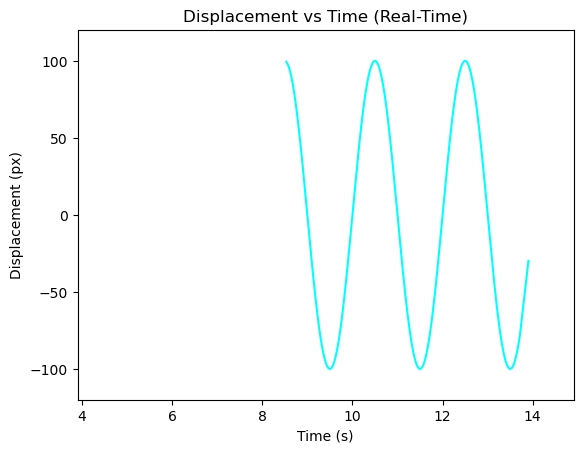

In [117]:
# active two thread(pygame + matplotlib)
if __name__ == '__main__':
    threading.Thread(target=run_plot, daemon=True).start()
    run_pygame()